In [1]:
import torch.nn as nn

from model import NeuralNetModel, LogisticRegressionClassifier
from dataset import PatientDataset, M1Imputation, M2Imputation
from utils import UtilityFunction, RealOutcomesSimulator

import torch
import random
import numpy as np

import matplotlib.pyplot as plt


In [2]:
# Set the random seed for PyTorch
seed = 42  # Choose any integer
torch.manual_seed(seed)

# If you're using a GPU
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # If you use multiple GPUs

# Set the random seed for Python's built-in random module
random.seed(seed)

# Set the random seed for NumPy
np.random.seed(seed)

# Ensure deterministic behavior for some operations
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

dataset_train = PatientDataset.from_file("data/train.npz")
dataset_val = PatientDataset.from_file("data/val.npz")
dataset_test = PatientDataset.from_file("data/test.npz")
print(f"Train: {len(dataset_train)} patients")
print(f"Val: {len(dataset_val)} patients")
print(f"Test: {len(dataset_test)} patients")

def data_imputation(datasets={}, method=M2Imputation):

    imputed_datasets = {}
    
    for key in datasets.keys():
        m = method(dataset=datasets[key])
        imputed_datasets[key] = m.impute_dataset()

    return imputed_datasets

imputed_datasets = data_imputation(
    datasets={
        'train':dataset_train, 'val':dataset_val, 'test':dataset_test,
    },
    method=M2Imputation
)


Train: 5000 patients
Val: 5000 patients
Test: 5000 patients
global_mean_features.shape = (40,)


/home/maschine/Desktop/6_7300_proj2/dataset.py:70: RuntimeWarning: Mean of empty slice
  patient_mean_features[patient_idx, :] = np.nanmean(x, axis=0)
/home/maschine/Desktop/6_7300_proj2/dataset.py:78: RuntimeWarning: Mean of empty slice
  global_mean_features = np.nanmean(patient_mean_features, axis=0)


global_mean_features.shape = (40,)
global_mean_features.shape = (40,)


In [3]:
from model import LRModel
from sklearn.linear_model import LogisticRegression

my_model = LRModel(model=LogisticRegression(
    max_iter=100,
))
my_model.fit(
    data = imputed_datasets['train']
)

In [4]:
utility_fn = UtilityFunction()
simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
utility = simulator_test.compute_utility(my_model)
print(f" the utility achieved is: {utility['u_total']}")

100%|██████████| 5000/5000 [00:07<00:00, 649.15it/s]

 the utility achieved is: -6214.088888888887


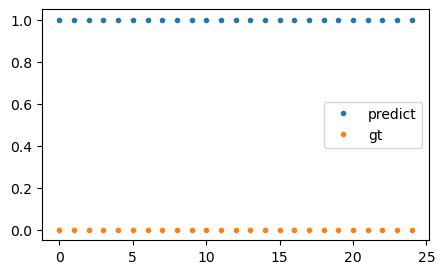

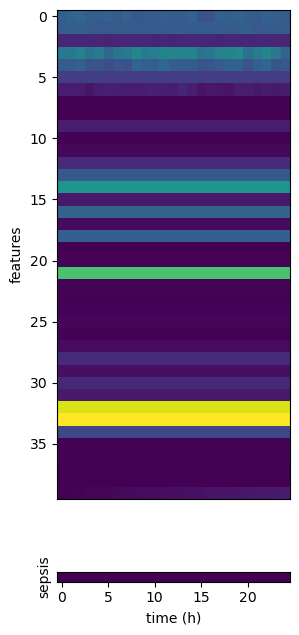

In [5]:
patient_idx = 0

fig, ax = plt.subplots(1,1, figsize=(5, 3))

ax.plot(utility['preds'][patient_idx], '.', label='predict')
ax.plot(imputed_datasets['train'][patient_idx][1], '.', label='gt')
plt.legend()
plt.show()

from visualize_data import plot_data_heatmap

plot_data_heatmap(imputed_datasets['train'], patient_no=patient_idx)

In [6]:
# my_model = NeuralNetModel()
# device = 'cuda'
# my_model.fit(
#     train_data = imputed_datasets['train'],
#     val_data = imputed_datasets['val'],
#     config = {
#     'classifer':LogisticRegressionClassifier,
#     'lr':1e-3, 
#     'criteria':nn.BCELoss(), 
#     'n_epoch':10,
#     'batch_size':128,
#     'device':device,
#     })

# utility_fn = UtilityFunction()
# simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# # print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
# utility = simulator_test.compute_utility(my_model)
# print(f" the utility achieved is: {utility['u_total']}")

In [7]:
# from loss import CustomBCELoss

# my_model = NeuralNetModel()
# device = 'cuda'
# my_model.fit(
#     train_data = imputed_datasets['train'],
#     val_data = imputed_datasets['val'],
#     config = {
#     'classifer':LogisticRegressionClassifier,
#     'lr':1e-2, 
#     'criteria':CustomBCELoss(scale_factor=5), 
#     'n_epoch':10,
#     'batch_size':128,
#     'device':device,
#     })

# utility_fn = UtilityFunction()
# simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# # print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
# utility = simulator_test.compute_utility(my_model)
# print(f" the utility achieved is: {utility['u_total']}")

In [8]:
# from model import MLP

# from loss import CustomBCELoss

# my_model = NeuralNetModel()
# device = 'cuda'
# my_model.fit(
#     train_data = imputed_datasets['train'],
#     val_data = imputed_datasets['val'],
#     config = {
#     'classifer':MLP,
#     'lr':1e-2, 
#     'criteria':CustomBCELoss(scale_factor=5), 
#     'n_epoch':10,
#     'batch_size':128,
#     'device':device,
#     })

# utility_fn = UtilityFunction()
# simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# # print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
# utility = simulator_test.compute_utility(my_model)
# print(f" the utility achieved is: {utility['u_total']}")


In [9]:
imputed_datasets

{'train': <dataset.PatientDataset at 0x7f9f87310850>,
 'val': <dataset.PatientDataset at 0x7f9f871d3150>,
 'test': <dataset.PatientDataset at 0x7f9f8709da10>}

In [10]:
for x, y in imputed_datasets['train']:
    print(y)
    break

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


input_dim = 241


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch [1/50], Training Loss: -16170.4939, Val Loss: -203.1078
confusion matrix: {'TP': 52230, 'TN': 33561, 'FP': 63075, 'FN': 44640}


  2%|▏         | 1/50 [00:36<30:07, 36.90s/it]

 the utility achieved is: -2803.5166666666646
Epoch [2/50], Training Loss: -17763.1602, Val Loss: -188.4451
confusion matrix: {'TP': 31564, 'TN': 58144, 'FP': 38795, 'FN': 65003}


  4%|▍         | 2/50 [01:13<29:14, 36.56s/it]

 the utility achieved is: -2775.183333333332
Epoch [3/50], Training Loss: -17896.2820, Val Loss: -211.5381
confusion matrix: {'TP': 31794, 'TN': 62030, 'FP': 34493, 'FN': 65189}


  6%|▌         | 3/50 [01:49<28:40, 36.60s/it]

 the utility achieved is: -2763.499999999999
Epoch [4/50], Training Loss: -17992.2052, Val Loss: -83.8754
confusion matrix: {'TP': 31910, 'TN': 62990, 'FP': 33755, 'FN': 64851}


  8%|▊         | 4/50 [02:26<27:56, 36.45s/it]

 the utility achieved is: -2757.594444444443
Epoch [5/50], Training Loss: -17843.6390, Val Loss: -177.4151
confusion matrix: {'TP': 31463, 'TN': 65397, 'FP': 31121, 'FN': 65525}


 10%|█         | 5/50 [03:02<27:26, 36.58s/it]

 the utility achieved is: -2681.7722222222196
Epoch [6/50], Training Loss: -17891.3803, Val Loss: -184.9240
confusion matrix: {'TP': 31726, 'TN': 58886, 'FP': 37721, 'FN': 65173}


 12%|█▏        | 6/50 [03:39<26:51, 36.63s/it]

 the utility achieved is: -2687.7222222222204
Epoch [7/50], Training Loss: -17878.7944, Val Loss: -196.6104
confusion matrix: {'TP': 31576, 'TN': 55767, 'FP': 40549, 'FN': 65614}


 14%|█▍        | 7/50 [04:16<26:14, 36.62s/it]

 the utility achieved is: -2679.8722222222204
Epoch [8/50], Training Loss: -17917.6660, Val Loss: -131.4977
confusion matrix: {'TP': 31382, 'TN': 66193, 'FP': 30454, 'FN': 65477}


 16%|█▌        | 8/50 [04:52<25:40, 36.67s/it]

 the utility achieved is: -2682.7222222222204
Epoch [9/50], Training Loss: -18043.6924, Val Loss: -116.3414
confusion matrix: {'TP': 31664, 'TN': 62243, 'FP': 34462, 'FN': 65137}


 18%|█▊        | 9/50 [05:29<25:04, 36.68s/it]

 the utility achieved is: -2681.5722222222207
Epoch [10/50], Training Loss: -17801.6604, Val Loss: -0.8436
confusion matrix: {'TP': 31119, 'TN': 69105, 'FP': 27904, 'FN': 65378}


 20%|██        | 10/50 [06:06<24:32, 36.81s/it]

 the utility achieved is: -2679.9722222222204
Epoch [11/50], Training Loss: -17781.3979, Val Loss: 12.1443
confusion matrix: {'TP': 31124, 'TN': 69890, 'FP': 26925, 'FN': 65567}


 22%|██▏       | 11/50 [06:43<23:55, 36.82s/it]

 the utility achieved is: -2678.2222222222204
Epoch [12/50], Training Loss: -17891.6228, Val Loss: 28.4422
confusion matrix: {'TP': 31357, 'TN': 69588, 'FP': 27613, 'FN': 64948}


 24%|██▍       | 12/50 [07:20<23:18, 36.80s/it]

 the utility achieved is: -2678.2222222222204
Epoch [13/50], Training Loss: -17852.6647, Val Loss: -69.9937
confusion matrix: {'TP': 32055, 'TN': 57517, 'FP': 39297, 'FN': 64637}


 26%|██▌       | 13/50 [07:57<22:41, 36.80s/it]

 the utility achieved is: -2684.5222222222205
Epoch [14/50], Training Loss: -17797.5239, Val Loss: -106.9941
confusion matrix: {'TP': 31339, 'TN': 61418, 'FP': 35182, 'FN': 65567}


 28%|██▊       | 14/50 [08:33<22:02, 36.75s/it]

 the utility achieved is: -2679.3722222222204
Epoch [15/50], Training Loss: -17602.4375, Val Loss: -120.6823
confusion matrix: {'TP': 31437, 'TN': 59640, 'FP': 37501, 'FN': 64928}


 30%|███       | 15/50 [09:10<21:21, 36.62s/it]

 the utility achieved is: -2708.388888888887
Epoch [16/50], Training Loss: -17685.6074, Val Loss: -118.4580
confusion matrix: {'TP': 31137, 'TN': 57978, 'FP': 38793, 'FN': 65598}


 32%|███▏      | 16/50 [09:46<20:38, 36.44s/it]

 the utility achieved is: -2711.988888888887
Epoch [17/50], Training Loss: -17940.7724, Val Loss: 14.4743
confusion matrix: {'TP': 31405, 'TN': 65037, 'FP': 31664, 'FN': 65400}


 34%|███▍      | 17/50 [10:22<20:03, 36.47s/it]

 the utility achieved is: -2694.738888888887
Epoch [18/50], Training Loss: -17851.1092, Val Loss: -37.7761
confusion matrix: {'TP': 31173, 'TN': 65839, 'FP': 30696, 'FN': 65798}


 36%|███▌      | 18/50 [10:58<19:24, 36.38s/it]

 the utility achieved is: -2670.46111111111
Epoch [19/50], Training Loss: -17924.5951, Val Loss: -3.2488
confusion matrix: {'TP': 31225, 'TN': 64035, 'FP': 32941, 'FN': 65305}


 36%|███▌      | 18/50 [11:14<19:59, 37.48s/it]


KeyboardInterrupt: 

In [9]:
from model import EnhancedMLP

from loss import CustomBCELoss

my_model = NeuralNetModel()
device = 'cuda'
my_model.fit(
    # train_data = imputed_datasets['train'],
    # val_data = imputed_datasets['val'],
    data = imputed_datasets,
    config = {
    'classifer':EnhancedMLP,
    'lr':1e-3, 
    'criteria':CustomBCELoss(scale_factor=0.5), 
    'n_epoch':50,
    'batch_size':32,
    'device':device,
    'class_balanced':True,
    })

utility_fn = UtilityFunction()
simulator_test = RealOutcomesSimulator(imputed_datasets['train'], utility_fn)
# print(f"\nSimulating the hospitalization of patients in the test dataset with decisions made by your model, the utility achieved is: {simulator_test.compute_utility(my_model)}")
utility = simulator_test.compute_utility(my_model)
print(f" the utility achieved is: {utility['u_total']}")


input_dim = 240


  2%|▏         | 1/50 [00:01<01:28,  1.81s/it]

Epoch [1/50], Training Loss: 0.1743, Val Loss: 0.2779
confusion matrix: {'TP': 82862, 'TN': 89954, 'FP': 6665, 'FN': 14025}


  4%|▍         | 2/50 [00:03<01:24,  1.77s/it]

Epoch [2/50], Training Loss: 0.0692, Val Loss: 0.3506
confusion matrix: {'TP': 94389, 'TN': 93698, 'FP': 3301, 'FN': 2118}


  6%|▌         | 3/50 [00:05<01:22,  1.75s/it]

Epoch [3/50], Training Loss: 0.0546, Val Loss: 0.3924
confusion matrix: {'TP': 95487, 'TN': 94098, 'FP': 2400, 'FN': 1521}


  8%|▊         | 4/50 [00:07<01:20,  1.74s/it]

Epoch [4/50], Training Loss: 0.0433, Val Loss: 0.4094
confusion matrix: {'TP': 95509, 'TN': 94820, 'FP': 1919, 'FN': 1258}


 10%|█         | 5/50 [00:08<01:17,  1.73s/it]

Epoch [5/50], Training Loss: 0.0415, Val Loss: 0.4068
confusion matrix: {'TP': 95833, 'TN': 94822, 'FP': 1707, 'FN': 1144}


 12%|█▏        | 6/50 [00:10<01:16,  1.74s/it]

Epoch [6/50], Training Loss: 0.0354, Val Loss: 0.4161
confusion matrix: {'TP': 95743, 'TN': 95094, 'FP': 1541, 'FN': 1128}


 14%|█▍        | 7/50 [00:12<01:15,  1.75s/it]

Epoch [7/50], Training Loss: 0.0352, Val Loss: 0.4128
confusion matrix: {'TP': 96299, 'TN': 94872, 'FP': 1393, 'FN': 942}


 16%|█▌        | 8/50 [00:14<01:13,  1.76s/it]

Epoch [8/50], Training Loss: 0.0306, Val Loss: 0.4710
confusion matrix: {'TP': 95886, 'TN': 95420, 'FP': 1268, 'FN': 932}


 18%|█▊        | 9/50 [00:15<01:12,  1.76s/it]

Epoch [9/50], Training Loss: 0.0287, Val Loss: 0.5842
confusion matrix: {'TP': 95912, 'TN': 95481, 'FP': 1208, 'FN': 905}


 20%|██        | 10/50 [00:17<01:09,  1.74s/it]

Epoch [10/50], Training Loss: 0.0270, Val Loss: 0.4824
confusion matrix: {'TP': 95659, 'TN': 95871, 'FP': 1129, 'FN': 847}


 22%|██▏       | 11/50 [00:19<01:07,  1.74s/it]

Epoch [11/50], Training Loss: 0.0253, Val Loss: 0.5760
confusion matrix: {'TP': 95849, 'TN': 95821, 'FP': 1015, 'FN': 821}


 24%|██▍       | 12/50 [00:20<01:06,  1.74s/it]

Epoch [12/50], Training Loss: 0.0238, Val Loss: 0.4942
confusion matrix: {'TP': 95594, 'TN': 96249, 'FP': 942, 'FN': 721}


 26%|██▌       | 13/50 [00:22<01:04,  1.75s/it]

Epoch [13/50], Training Loss: 0.0239, Val Loss: 0.4681
confusion matrix: {'TP': 95893, 'TN': 95859, 'FP': 962, 'FN': 792}


 28%|██▊       | 14/50 [00:24<01:03,  1.75s/it]

Epoch [14/50], Training Loss: 0.0216, Val Loss: 0.5362
confusion matrix: {'TP': 96206, 'TN': 95753, 'FP': 857, 'FN': 690}


 30%|███       | 15/50 [00:26<01:01,  1.75s/it]

Epoch [15/50], Training Loss: 0.0215, Val Loss: 0.4677
confusion matrix: {'TP': 95665, 'TN': 96265, 'FP': 867, 'FN': 709}


 32%|███▏      | 16/50 [00:27<00:59,  1.74s/it]

Epoch [16/50], Training Loss: 0.0203, Val Loss: 0.5776
confusion matrix: {'TP': 96086, 'TN': 95900, 'FP': 808, 'FN': 712}


 34%|███▍      | 17/50 [00:29<00:57,  1.73s/it]

Epoch [17/50], Training Loss: 0.0201, Val Loss: 0.6658
confusion matrix: {'TP': 96029, 'TN': 95982, 'FP': 808, 'FN': 687}


 36%|███▌      | 18/50 [00:31<00:55,  1.74s/it]

Epoch [18/50], Training Loss: 0.0198, Val Loss: 0.6918
confusion matrix: {'TP': 96333, 'TN': 95751, 'FP': 775, 'FN': 647}


 38%|███▊      | 19/50 [00:33<00:54,  1.74s/it]

Epoch [19/50], Training Loss: 0.0192, Val Loss: 0.5697
confusion matrix: {'TP': 95863, 'TN': 96225, 'FP': 754, 'FN': 664}


 40%|████      | 20/50 [00:34<00:52,  1.74s/it]

Epoch [20/50], Training Loss: 0.0174, Val Loss: 0.7641
confusion matrix: {'TP': 96045, 'TN': 96152, 'FP': 711, 'FN': 598}


 42%|████▏     | 21/50 [00:36<00:50,  1.73s/it]

Epoch [21/50], Training Loss: 0.0168, Val Loss: 0.6720
confusion matrix: {'TP': 95954, 'TN': 96338, 'FP': 642, 'FN': 572}


 44%|████▍     | 22/50 [00:38<00:48,  1.72s/it]

Epoch [22/50], Training Loss: 0.0172, Val Loss: 0.8363
confusion matrix: {'TP': 96109, 'TN': 96123, 'FP': 678, 'FN': 596}


 46%|████▌     | 23/50 [00:40<00:46,  1.73s/it]

Epoch [23/50], Training Loss: 0.0165, Val Loss: 0.7720
confusion matrix: {'TP': 96194, 'TN': 96066, 'FP': 649, 'FN': 597}


 48%|████▊     | 24/50 [00:41<00:45,  1.74s/it]

Epoch [24/50], Training Loss: 0.0161, Val Loss: 0.8488
confusion matrix: {'TP': 95985, 'TN': 96330, 'FP': 622, 'FN': 569}


 50%|█████     | 25/50 [00:43<00:43,  1.73s/it]

Epoch [25/50], Training Loss: 0.0160, Val Loss: 0.7181
confusion matrix: {'TP': 96011, 'TN': 96297, 'FP': 632, 'FN': 566}


 52%|█████▏    | 26/50 [00:45<00:41,  1.74s/it]

Epoch [26/50], Training Loss: 0.0151, Val Loss: 0.7819
confusion matrix: {'TP': 96353, 'TN': 96034, 'FP': 594, 'FN': 525}


 54%|█████▍    | 27/50 [00:46<00:39,  1.72s/it]

Epoch [27/50], Training Loss: 0.0145, Val Loss: 0.8578
confusion matrix: {'TP': 96233, 'TN': 96183, 'FP': 568, 'FN': 522}


 56%|█████▌    | 28/50 [00:48<00:37,  1.72s/it]

Epoch [28/50], Training Loss: 0.0149, Val Loss: 0.8590
confusion matrix: {'TP': 96384, 'TN': 96019, 'FP': 587, 'FN': 516}


 58%|█████▊    | 29/50 [00:50<00:36,  1.72s/it]

Epoch [29/50], Training Loss: 0.0146, Val Loss: 0.8234
confusion matrix: {'TP': 96085, 'TN': 96290, 'FP': 586, 'FN': 545}


 60%|██████    | 30/50 [00:52<00:34,  1.73s/it]

Epoch [30/50], Training Loss: 0.0144, Val Loss: 0.8186
confusion matrix: {'TP': 96281, 'TN': 96144, 'FP': 566, 'FN': 515}


 62%|██████▏   | 31/50 [00:53<00:33,  1.76s/it]

Epoch [31/50], Training Loss: 0.0146, Val Loss: 0.8460
confusion matrix: {'TP': 96059, 'TN': 96399, 'FP': 571, 'FN': 477}


 64%|██████▍   | 32/50 [00:55<00:31,  1.76s/it]

Epoch [32/50], Training Loss: 0.0133, Val Loss: 0.8715
confusion matrix: {'TP': 96751, 'TN': 95733, 'FP': 531, 'FN': 491}


 66%|██████▌   | 33/50 [00:57<00:29,  1.74s/it]

Epoch [33/50], Training Loss: 0.0134, Val Loss: 0.8796
confusion matrix: {'TP': 96306, 'TN': 96159, 'FP': 536, 'FN': 505}


 68%|██████▊   | 34/50 [00:59<00:27,  1.73s/it]

Epoch [34/50], Training Loss: 0.0132, Val Loss: 0.8886
confusion matrix: {'TP': 96253, 'TN': 96280, 'FP': 520, 'FN': 453}


 70%|███████   | 35/50 [01:00<00:25,  1.72s/it]

Epoch [35/50], Training Loss: 0.0135, Val Loss: 0.7988
confusion matrix: {'TP': 95931, 'TN': 96569, 'FP': 523, 'FN': 483}


 72%|███████▏  | 36/50 [01:02<00:23,  1.71s/it]

Epoch [36/50], Training Loss: 0.0127, Val Loss: 0.9159
confusion matrix: {'TP': 95941, 'TN': 96575, 'FP': 506, 'FN': 484}


 74%|███████▍  | 37/50 [01:04<00:22,  1.72s/it]

Epoch [37/50], Training Loss: 0.0123, Val Loss: 0.9368
confusion matrix: {'TP': 96138, 'TN': 96434, 'FP': 488, 'FN': 446}


 76%|███████▌  | 38/50 [01:05<00:20,  1.72s/it]

Epoch [38/50], Training Loss: 0.0125, Val Loss: 1.0576
confusion matrix: {'TP': 96101, 'TN': 96521, 'FP': 460, 'FN': 424}


 78%|███████▊  | 39/50 [01:07<00:19,  1.74s/it]

Epoch [39/50], Training Loss: 0.0122, Val Loss: 0.9578
confusion matrix: {'TP': 96257, 'TN': 96327, 'FP': 479, 'FN': 443}


 80%|████████  | 40/50 [01:09<00:17,  1.73s/it]

Epoch [40/50], Training Loss: 0.0117, Val Loss: 0.7505
confusion matrix: {'TP': 96412, 'TN': 96240, 'FP': 435, 'FN': 419}


 82%|████████▏ | 41/50 [01:11<00:15,  1.74s/it]

Epoch [41/50], Training Loss: 0.0118, Val Loss: 0.8827
confusion matrix: {'TP': 96067, 'TN': 96529, 'FP': 448, 'FN': 462}


 84%|████████▍ | 42/50 [01:12<00:13,  1.74s/it]

Epoch [42/50], Training Loss: 0.0118, Val Loss: 0.8750
confusion matrix: {'TP': 96119, 'TN': 96496, 'FP': 461, 'FN': 430}


 86%|████████▌ | 43/50 [01:14<00:12,  1.74s/it]

Epoch [43/50], Training Loss: 0.0117, Val Loss: 0.8829
confusion matrix: {'TP': 96488, 'TN': 96125, 'FP': 461, 'FN': 432}


 88%|████████▊ | 44/50 [01:16<00:10,  1.74s/it]

Epoch [44/50], Training Loss: 0.0114, Val Loss: 1.0330
confusion matrix: {'TP': 96364, 'TN': 96251, 'FP': 447, 'FN': 444}


 90%|█████████ | 45/50 [01:18<00:08,  1.74s/it]

Epoch [45/50], Training Loss: 0.0111, Val Loss: 1.0251
confusion matrix: {'TP': 95891, 'TN': 96780, 'FP': 425, 'FN': 410}


 92%|█████████▏| 46/50 [01:19<00:06,  1.75s/it]

Epoch [46/50], Training Loss: 0.0106, Val Loss: 1.0860
confusion matrix: {'TP': 96576, 'TN': 96097, 'FP': 414, 'FN': 419}


 94%|█████████▍| 47/50 [01:21<00:05,  1.73s/it]

Epoch [47/50], Training Loss: 0.0104, Val Loss: 1.0391
confusion matrix: {'TP': 96003, 'TN': 96692, 'FP': 419, 'FN': 392}


 96%|█████████▌| 48/50 [01:23<00:03,  1.72s/it]

Epoch [48/50], Training Loss: 0.0105, Val Loss: 1.1038
confusion matrix: {'TP': 96266, 'TN': 96471, 'FP': 394, 'FN': 375}


 98%|█████████▊| 49/50 [01:25<00:01,  1.73s/it]

Epoch [49/50], Training Loss: 0.0109, Val Loss: 0.9149
confusion matrix: {'TP': 95946, 'TN': 96703, 'FP': 433, 'FN': 424}


100%|██████████| 50/50 [01:26<00:00,  1.74s/it]


Epoch [50/50], Training Loss: 0.0098, Val Loss: 1.0945
confusion matrix: {'TP': 96156, 'TN': 96580, 'FP': 373, 'FN': 397}
Training complete.


100%|██████████| 5000/5000 [00:23<00:00, 214.64it/s]

 the utility achieved is: -2924.5944444444444
